In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data,
                                                                     target,
                                                                     test_size=0.2,
                                                                     random_state=42)

In [6]:
train_input.shape

(5197, 3)

In [7]:
test_input.shape

(1300, 3)

In [8]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target)

0.7808350971714451

In [11]:
lr.score(test_scaled, test_target)

0.7776923076923077

In [12]:
lr.coef_

array([[ 0.51270274,  1.6733911 , -0.68767781]])

In [15]:
lr.intercept_

array([1.81777902])

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target)

0.996921300750433

In [19]:
dt.score(test_scaled, test_target)

0.8592307692307692

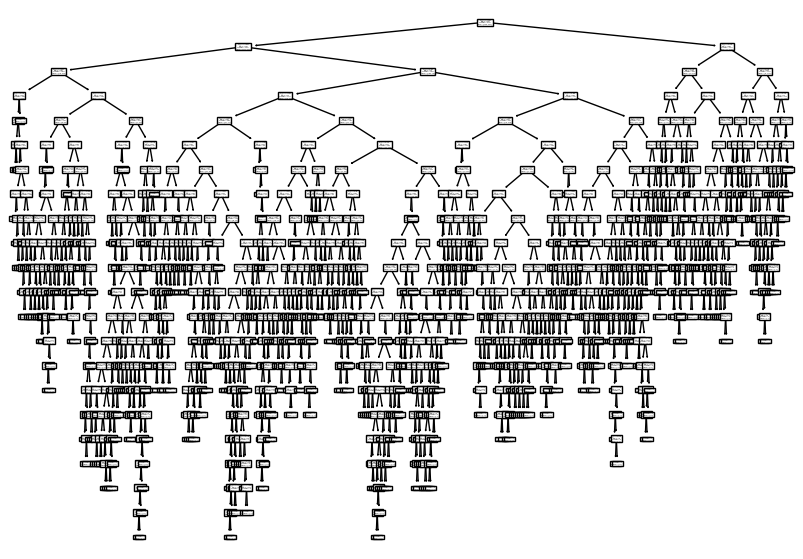

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

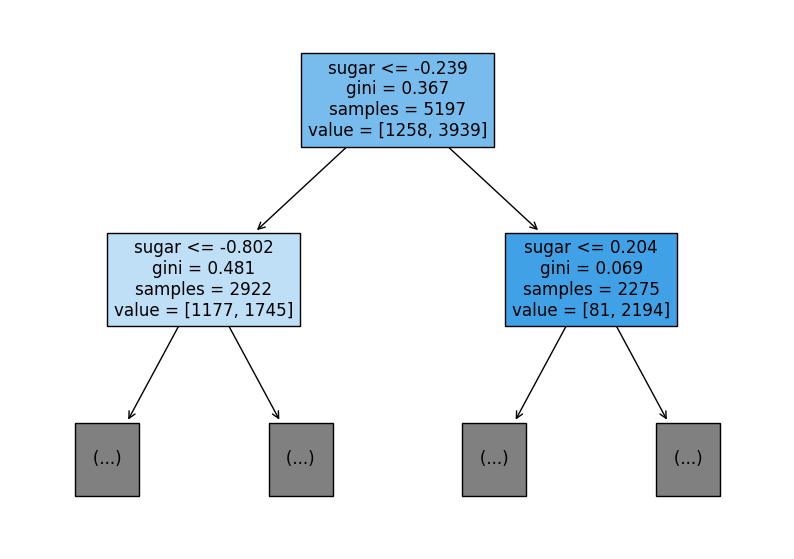

In [23]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [24]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target)

0.8454877814123533

In [25]:
dt.score(test_scaled, test_target)

0.8415384615384616

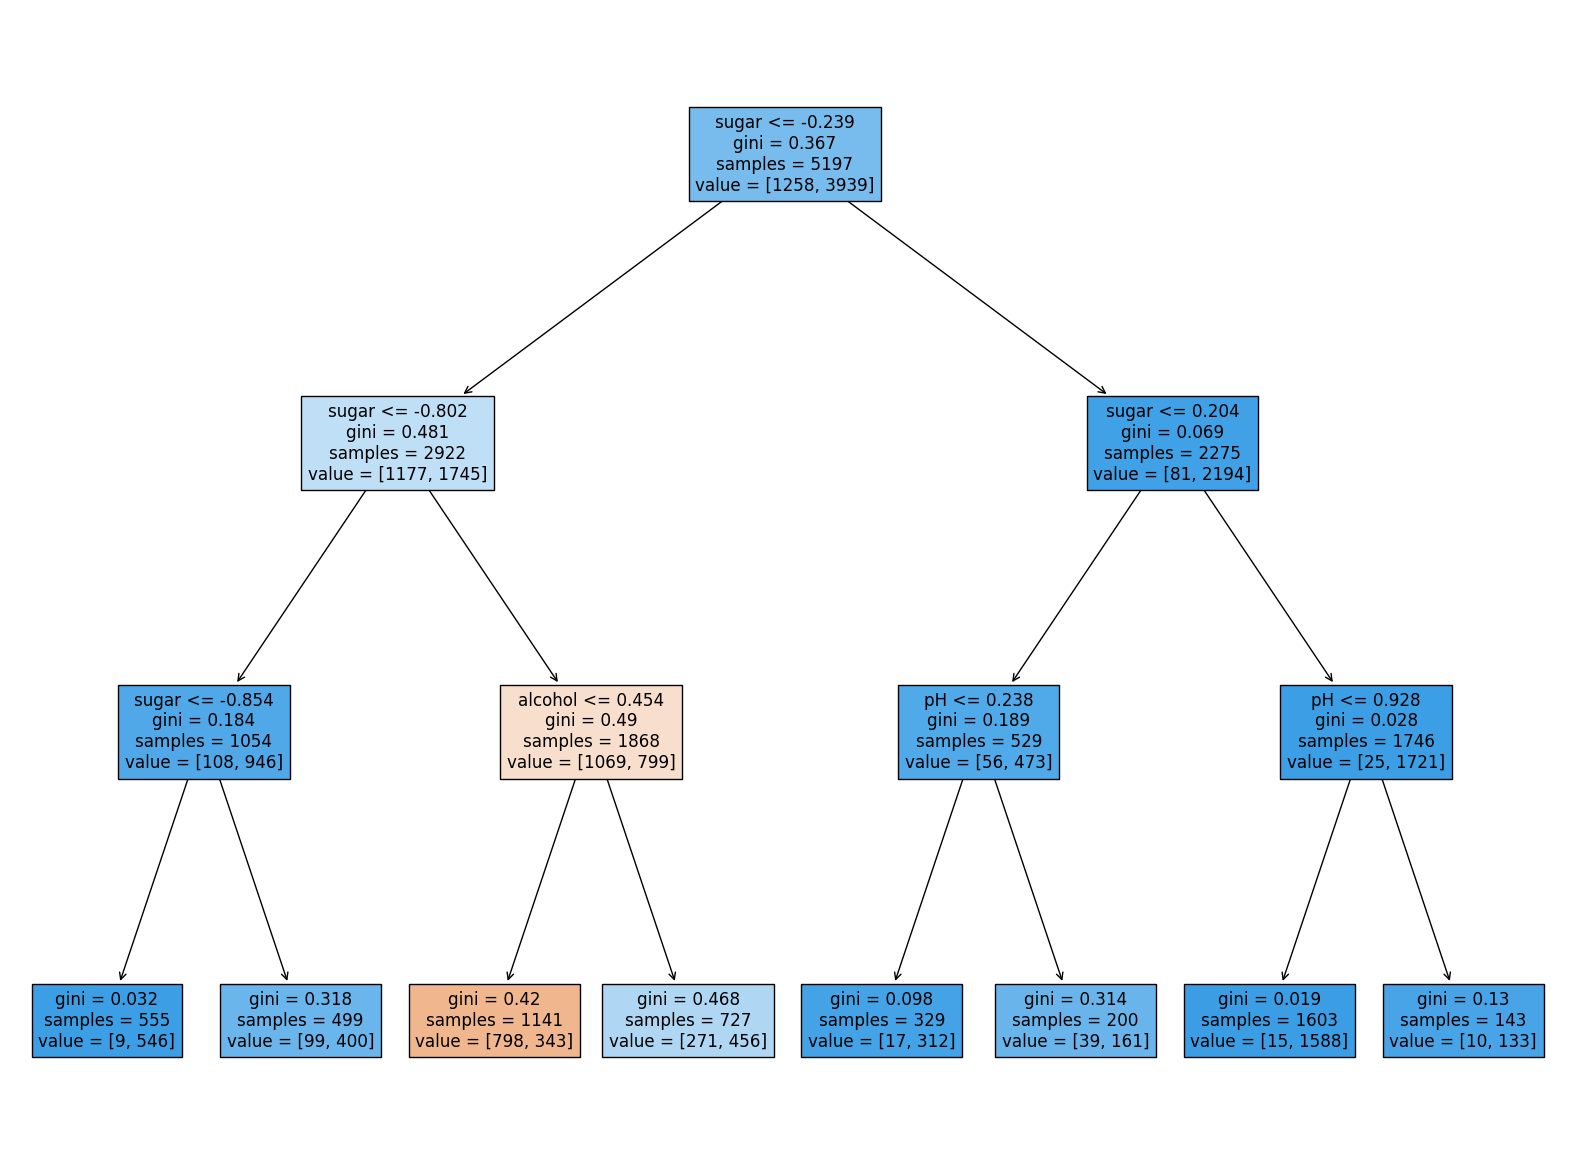

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [28]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target)

0.8454877814123533

In [29]:
dt.score(test_input, test_target)

0.8415384615384616

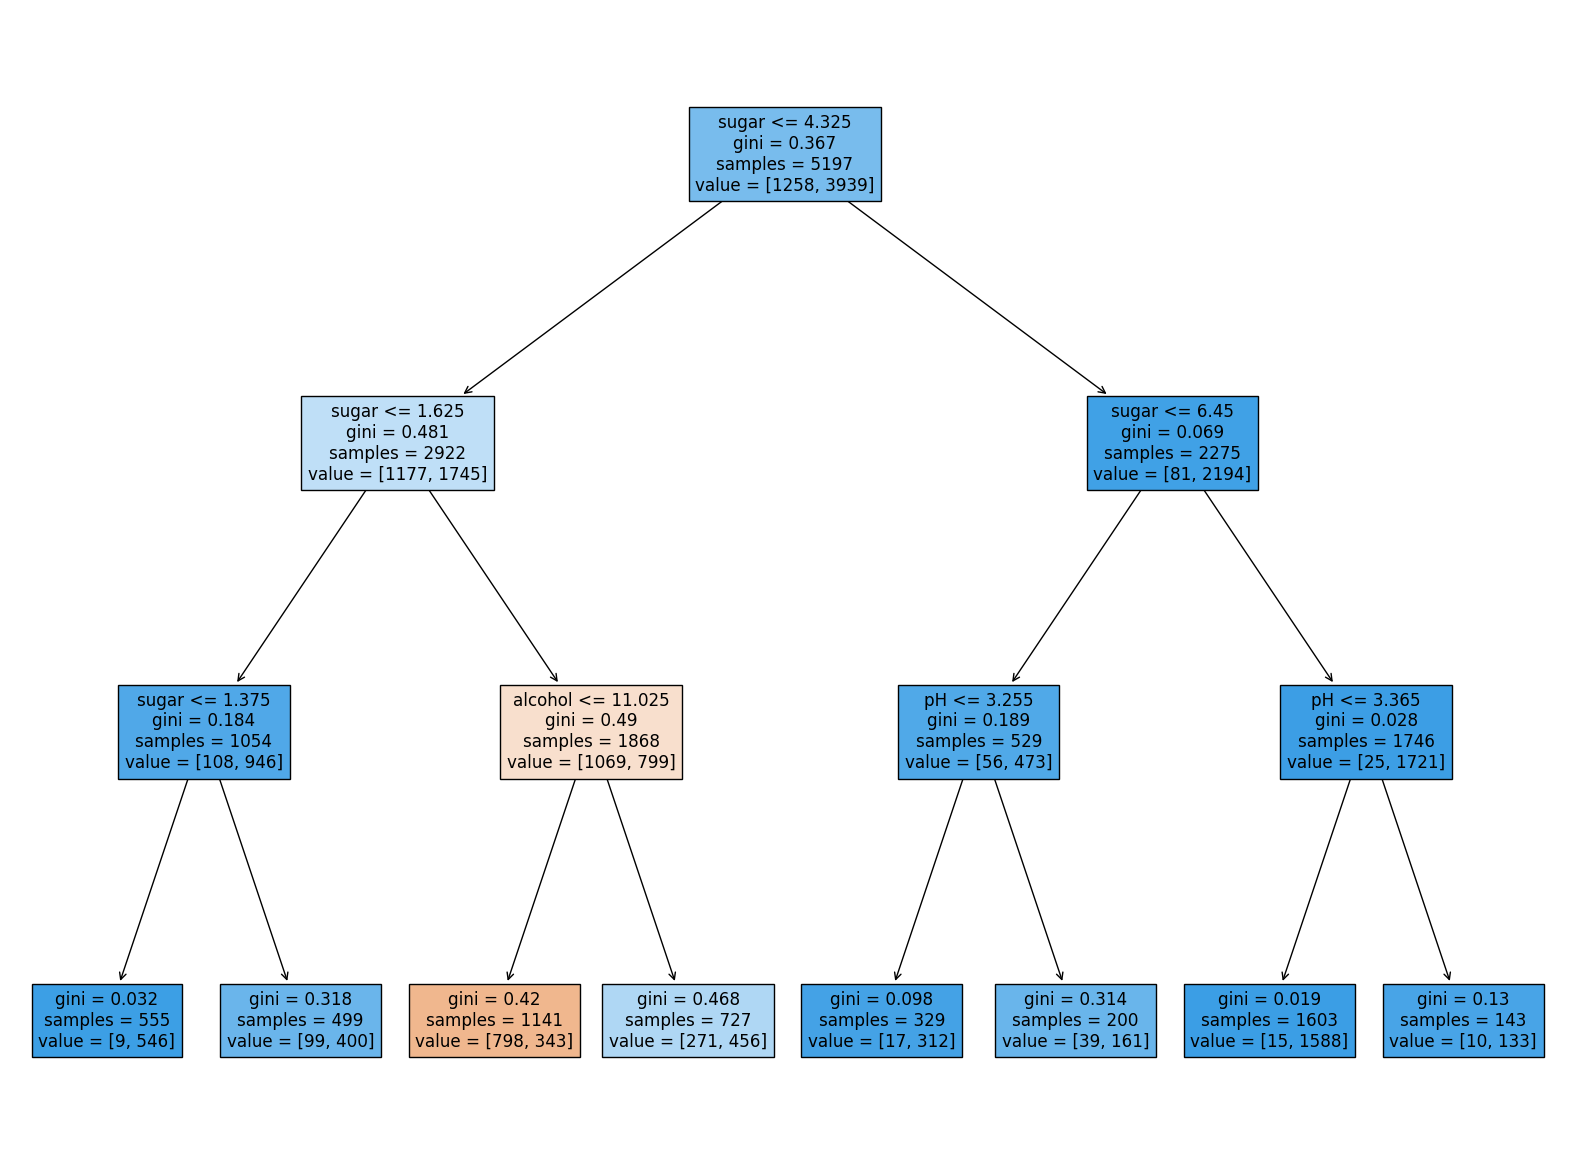

In [31]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [33]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])